## Raw plot vs pandas dataframe import

In [106]:
%run ../../lib/basic-import.ipynb
%run ../../lib/plot-functions.ipynb

In [107]:
def pd_plot_lap():
    add_df = pd.concat(all_dfs, axis=1, keys=[a[:-4] for a in participant_files])
    rightPosition = 1.00
    leftPosition = -0.10
    add_df_338 = add_df['50338']
#    add_df_338.set_index('timestamp', inplace=True)
    add_df_338 = add_df_338[add_df_338['timestamp'].notnull()]

    fig, ax = plt.subplots()
    #fig.subplots_adjust(right=2)

    ax2 = ax.twinx()
    ax3 = ax.twinx()
    ax4 = ax.twinx()
    ax5 = ax.twinx()
    ax6 = ax.twinx()

    rightPosition = ax_modification(ax2,'right', rightPosition)
    rightPosition = ax_modification(ax3,'right', rightPosition)
    leftPosition = ax_modification(ax4,'left', leftPosition)
    rightPosition = ax_modification(ax5,'right', rightPosition)
    leftPosition = ax_modification(ax6,'left', leftPosition)

    #create new pd lap_df. Contains only +-30 sec and laps
    tempAdd_df = []
    lapDates = []
    lapCount = 0
    for i in add_df_338.index:
        if add_df_338.loc[i,'lap'] > lapCount:
            lapDates.append(add_df_338.loc[i,'timestamp'])
            lapCount += 1

    add_df_338.set_index('timestamp', inplace=True)
    timedelta_30s = pd.Timedelta("00:00:30")
    for i in range(len(lapDates)):
        startRow = add_df_338.index.get_loc(lapDates[i]-timedelta_30s)
        endRow = add_df_338.index.get_loc(lapDates[i]+timedelta_30s)
        tempAdd_df.append(add_df_338.iloc[startRow:endRow])
#        tempAdd_df[i].iloc[-1:, [tempAdd_df[i].columns.get_loc(col) for col in fitgen_cols[1:]]]=np.NaN
    #lap_df = pd.concat(tempAdd_df)
    #print(type(tempAdd_df[0]))
#    lap_df.index = lap_df['timestamp']
#    lap_df.set_index('timestamp')
#    lap_df.index = map(lambda x: str(x)[-8:], lap_df.index)

#    print(lapDates)
#    print(tempAdd_df)

    trans = ax.get_xaxis_transform()
 #   for i in range(len(lapDates)):
    i = 1
 #   
 #   
 #   print(lapDates[i])
    #print(tempAdd_df[i].index)
    tempAdd_df[i]['accumulated_power'].plot(ax=ax, color='red',legend=False, title="all laps +-30, pd 50338")
    tempAdd_df[i]['speed'].plot(ax=ax2, color='blue',legend=False)
    tempAdd_df[i]['power'].plot(ax=ax3, color='green',legend=False)
    tempAdd_df[i]['altitude'].plot(ax=ax4, color='orange',legend=False)
    tempAdd_df[i]['distance'].plot(ax=ax5, color='lightcoral',legend=False)
    tempAdd_df[i]['heart_rate'].plot(ax=ax6, color='purple',legend=False)    
    ax.axvline((lapDates[i]), color='black', linestyle='--', lw=2)
    ax.text((lapDates[i]),.5,(lapDates[i]),transform=trans)

    print(tempAdd_df[i].keys())

#    plt.plot(tempAdd_df[i]['timestamp'], tempAdd_df[i]['accumulated_power'])

    ax_style(ax,'Accumulated Power','red')
    ax_style(ax2,'Speed','blue')
    ax_style(ax3,'Power','green')
    ax_style(ax4,'Altitude','orange')
    ax_style(ax5,'Distance','lightcoral')
    ax_style(ax6,'Heartrate','purple')

Index(['type', 'lap', 'stop', 'speed', 'enhanced_speed', 'distance', 'hrv',
       'heart_rate', 'accumulated_power', 'power', 'position_lat',
       'position_long', 'altitude', 'enhanced_altitude', 'cadence',
       'factional_cadence', 'left_right_balnce', 'left_torque_effectiveness',
       'right_torque_effectiveness', 'left_pedal_smoothness',
       'right_pedal_smoothness', 'temperature'],
      dtype='object')


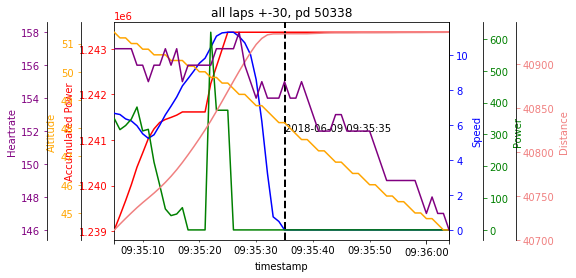

In [108]:
pd_plot_lap()